# Bangla Travel Chatbot

This is a demo chatbot that answers questions related to travelling inside Bangladesh. The chatbot currently answers from a fix pool of questions or related questions. It will be made context aware in the future using word embeddings.


Collaborators: Shuvo Saha Roy, AK Niloy


Import necessary libraries

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import io
import nltk
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input, Embedding, LSTM , Dense,GlobalAveragePooling1D,Flatten, Dropout , GRU
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Conv1D, MaxPool1D

Read dataset

In [2]:
dataset = pd.read_excel("QA_data.xlsx")
# dataset = dataset.sample(frac=1)
dataset.head()

,question,tags
0,What is the duration required for a bus journe...,time_duration_by_bus
1,Can you tell me how long it takes to travel fr...,time_duration_by_bus
2,How much time does a bus journey from Dhaka to...,time_duration_by_bus
3,What's the estimated travel time from Dhaka to...,time_duration_by_bus
4,Could you inform me about the duration of a bu...,time_duration_by_bus


In [3]:
import string
dataset['question'] = dataset['question'].apply(lambda sequence:
                                            [ltrs.lower() for ltrs in sequence if ltrs not in string.punctuation])

In [4]:
dataset.head()

,question,tags
0,"[w, h, a, t, , i, s, , t, h, e, , d, u, r, ...",time_duration_by_bus
1,"[c, a, n, , y, o, u, , t, e, l, l, , m, e, ...",time_duration_by_bus
2,"[h, o, w, , m, u, c, h, , t, i, m, e, , d, ...",time_duration_by_bus
3,"[w, h, a, t, s, , t, h, e, , e, s, t, i, m, ...",time_duration_by_bus
4,"[c, o, u, l, d, , y, o, u, , i, n, f, o, r, ...",time_duration_by_bus


In [5]:
dataset['question'] = dataset['question'].apply(lambda wrd: ''.join(wrd))
dataset.head()

,question,tags
0,what is the duration required for a bus journe...,time_duration_by_bus
1,can you tell me how long it takes to travel fr...,time_duration_by_bus
2,how much time does a bus journey from dhaka to...,time_duration_by_bus
3,whats the estimated travel time from dhaka to ...,time_duration_by_bus
4,could you inform me about the duration of a bu...,time_duration_by_bus


In [6]:
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(dataset['question'])
train = tokenizer.texts_to_sequences(dataset['question'])
features = pad_sequences(train)
le = LabelEncoder()
labels = le.fit_transform(dataset['tags'])

In [7]:
tags = le.inverse_transform(labels)[0]
tags

'time_duration_by_bus'

In [8]:
len(features[0])

23

In [9]:
input_shape = features.shape[1]
print(input_shape)

23


In [10]:
features.shape

(872, 23)

In [11]:
vocabulary = len(tokenizer.word_index)
print("number of unique words : ",vocabulary)
output_length = le.classes_.shape[0]
print("output length: ",output_length)

number of unique words :  674
output length:  12


In [12]:
tokenizer.word_index

{'the': 1,
 'coxs': 2,
 'bazar': 3,
 'in': 4,
 'for': 5,
 'are': 6,
 'what': 7,
 'which': 8,
 'to': 9,
 'and': 10,
 'is': 11,
 'of': 12,
 'dhaka': 13,
 'from': 14,
 'traditional': 15,
 'that': 16,
 'this': 17,
 'a': 18,
 'town': 19,
 'most': 20,
 'suitable': 21,
 'resorts': 22,
 'their': 23,
 'time': 24,
 'or': 25,
 'recommended': 26,
 'tourists': 27,
 'comfortable': 28,
 'travel': 29,
 'can': 30,
 'bus': 31,
 'offer': 32,
 'food': 33,
 'coxbazar': 34,
 'dress': 35,
 'season': 36,
 'journey': 37,
 'options': 38,
 'suitability': 39,
 'how': 40,
 'tourist': 41,
 'i': 42,
 'known': 43,
 'you': 44,
 'attire': 45,
 'best': 46,
 'stay': 47,
 'clothing': 48,
 'shops': 49,
 'experience': 50,
 'preferred': 51,
 'traveling': 52,
 'by': 53,
 'provide': 54,
 'spots': 55,
 'resort': 56,
 'specific': 57,
 'transportation': 58,
 'have': 59,
 'where': 60,
 'popular': 61,
 'costeffective': 62,
 'be': 63,
 'culinary': 64,
 'mode': 65,
 'highly': 66,
 'hotels': 67,
 'restaurants': 68,
 'there': 69,
 'cul

In [15]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=42, stratify=labels)


In [16]:
train_features.shape, test_features.shape

((697, 23), (175, 23))

### Complex LSTM Model

In [17]:
# m = Sequential()
# m.add(Input(shape=(features.shape[1])))
# m.add(Embedding(vocabulary + 1,100))
# m.add(Conv1D(filters=32, kernel_size=5, activation="relu", kernel_initializer=tf.keras.initializers.GlorotNormal(),bias_regularizer=tf.keras.regularizers.L2(0.0001), kernel_regularizer=tf.keras.regularizers.L2(0.0001), activity_regularizer = tf.keras.regularizers.L2(0.0001))) 
# m.add(Dropout(0.3))
# m.add(LSTM(32, dropout=0.3,return_sequences=True))
# m.add(LSTM(16, dropout=0.3,return_sequences=False))
# m.add(Dense(128,activation="relu", activity_regularizer = tf.keras.regularizers.L2(0.0001))) 
# m.add(Dropout(0.6))
# m.add(Dense(output_length, activation="softmax", activity_regularizer = tf.keras.regularizers.L2(0.0001)))

### simple LSTM model

In [18]:
# m = Sequential()
# m.add(Embedding(vocabulary + 1, 100, input_length=input_shape))
# m.add(LSTM(64))
# m.add(Dense(output_length, activation="softmax"))

### Bidirectional LSTM

In [19]:
# from tensorflow.keras.layers import Bidirectional

# m = Sequential()
# m.add(Embedding(vocabulary + 1, 100, input_length=input_shape))
# m.add(Bidirectional(LSTM(64)))
# m.add(Dense(output_length, activation="softmax"))

### GRU

In [20]:
from tensorflow.keras.layers import GRU

m = Sequential()
m.add(Embedding(vocabulary + 1, 100, input_length=input_shape))
m.add(GRU(64))
m.add(Dense(output_length, activation="softmax"))

In [21]:
m.layers

In [38]:
#!curl -O https://nlp.stanford.edu/data/glove.6B.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:03 --:--:--     0
100   346  100   346    0     0     96      0  0:00:03  0:00:03 --:--:--    96
100   346  100   346    0     0     96      0  0:00:03  0:00:03 --:--:--    96


In [23]:
glove_dir = "glove.6B.100d.txt"
embeddings_index = {}
file_ = open(glove_dir, encoding='utf-8')
for line in file_:
    arr = line.split()
    single_word = arr[0]
    w = np.asarray(arr[1:],dtype='float32')
    embeddings_index[single_word] = w
file_.close()
print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [24]:
max_words = vocabulary + 1
word_index = tokenizer.word_index
embedding_matrix = np.zeros((max_words,100)).astype(object)
for word , i in word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [25]:
m.layers[0].set_weights([embedding_matrix])
m.layers[0].trainable = False


In [26]:
m.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])
m.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 23, 100)           67500     
                                                                 
 gru (GRU)                   (None, 64)                31872     
                                                                 
 dense (Dense)               (None, 12)                780       
                                                                 
Total params: 100,152
Trainable params: 32,652
Non-trainable params: 67,500
_________________________________________________________________


In [27]:
from keras.callbacks import TensorBoard, EarlyStopping
earlyStopping = EarlyStopping(monitor = 'accuracy', patience = 10)

In [28]:
# history_training = m.fit(features,labels,epochs=100, batch_size=64, callbacks=[ earlyStopping])

history_training = m.fit(train_features, train_labels, epochs=100, batch_size=64, callbacks=[earlyStopping])

Epoch 1/100
11/11 [==============================] - 3s 15ms/step - loss: 2.2515 - accuracy: 0.2640
Epoch 2/100
11/11 [==============================] - 0s 15ms/step - loss: 1.8694 - accuracy: 0.4548
Epoch 3/100
11/11 [==============================] - 0s 15ms/step - loss: 1.5786 - accuracy: 0.6155
Epoch 4/100
11/11 [==============================] - 0s 17ms/step - loss: 1.2981 - accuracy: 0.6944
Epoch 5/100
11/11 [==============================] - 0s 15ms/step - loss: 1.0348 - accuracy: 0.7676
Epoch 6/100
11/11 [==============================] - 0s 15ms/step - loss: 0.7881 - accuracy: 0.8135
Epoch 7/100
11/11 [==============================] - 0s 15ms/step - loss: 0.5912 - accuracy: 0.8723
Epoch 8/100
11/11 [==============================] - 0s 15ms/step - loss: 0.4411 - accuracy: 0.9010
Epoch 9/100
11/11 [==============================] - 0s 15ms/step - loss: 0.3214 - accuracy: 0.9354
Epoch 10/100
11/11 [==============================] - 0s 16ms/step - loss: 0.2547 - accuracy: 0.9584

In [29]:
history_training.history['accuracy'][-1],history_training.history['loss'][-1]

(1.0, 0.012544757686555386)

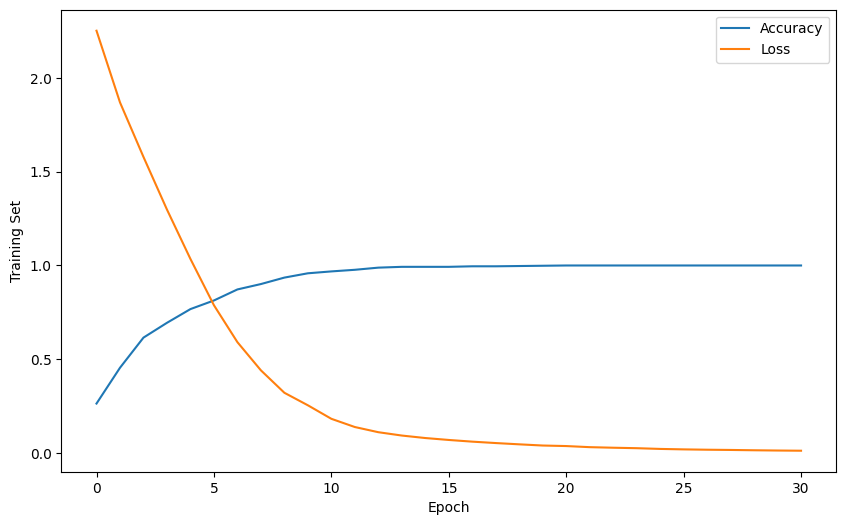

In [30]:
def draw_plot(data_dict, type_data):
#     mpl.style.use('seaborn')
    plt.figure(figsize=(10, 6))
    for label, data in data_dict.items():
        plt.plot(data, label=label)
    plt.xlabel('Epoch')
    plt.ylabel(type_data)
    plt.legend()
    plt.show()

data_dict = {
    'Accuracy': history_training.history['accuracy'],
    'Loss': history_training.history['loss']
}

draw_plot(data_dict, 'Training Set')


In [31]:
loss, accuracy = m.evaluate(test_features, test_labels, batch_size=64)

3/3 [==============================] - 1s 8ms/step - loss: 0.0181 - accuracy: 0.9943


6/6 [==============================] - 1s 5ms/step


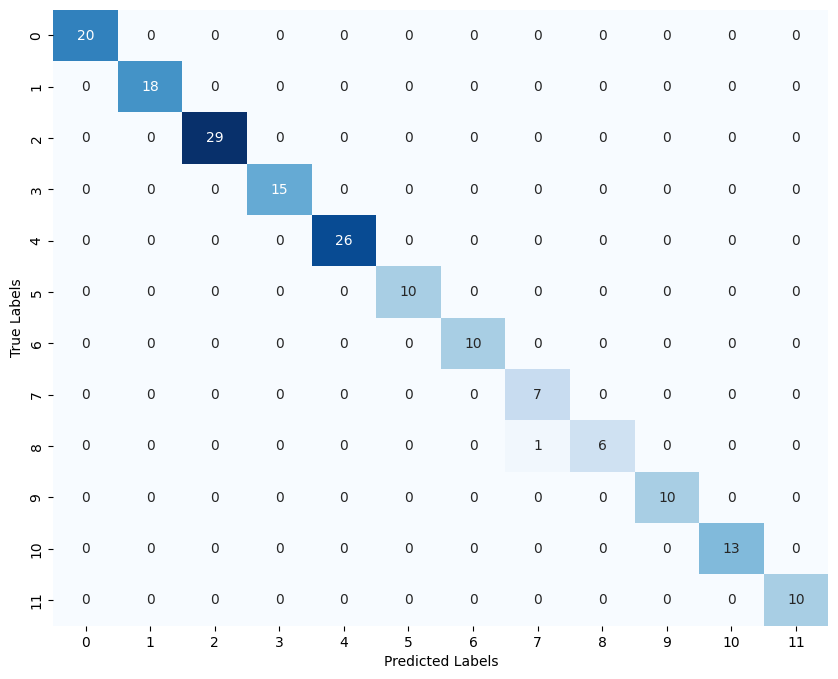

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

predictions = m.predict(test_features)
predicted_labels = np.argmax(predictions, axis=1)
cm = confusion_matrix(test_labels, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [34]:
responses = {
  
    "time_duration_by_bus": ["9-11 hours", "7- 8 hours", "11-12 hours", "7- 8 hours", "5 - 6 hours"],
    "time_duration_by_air": ["30-40 minute", "50-60 minute", "40-50 minute", "60-70 minute"],
    "suitable_time_for_coxs_bazar": ["Night", "Day"],
    "suitable_climate_or_season_for_coxs_bazar": ["winter", "rainy", "summer"],
    "comfotable_and_safe_transport_for_dahaka to coxsbazar": ["Air", "Bus", "train"],
    "popular_spot": ["Cox's Bazar Beach", "Marin Drive", "Inani Beach", "Laboni Beach", "Hima Chori"],
    "popular_hotel": ["Hotel The Cox Today", "Praasad Paradise", "Seagull Hotels", "Praasad Paradise", "Sea Pearl Beach Resort & Spa Cox's Bazar", "Muscat Holiday Resort"],
    "popular_restaurants": ["Mermaid Cafe", "Coral station", "Poushee Restaurant", "Chui Jhal"],
    "traditional_food": ["Shutki bhorta", "Big Rupchada", "fish fry", "Loitta fry", "Muri Ghonto", "Shutki bhorta"],
    "type_of_indigenous_people": ["chakma", "Tanchangya", "marma", "Tanchangya",
      "Bawm "
    ],
    "traditional_clothes": ["Pha-khum", "punjabi", "lingpi", "thewa", "mekhla"],
    "cost_effective_shop": ["Burmese Market(near cox's bazar)", "The Cox City Super Market", "K&K Burmese Market", "Bangla Bazar Station"]

 }

In [35]:
import random
def generate_answer(query):
  texts = []
  pred_input = query
#   pred_input = [letters.lower() for letters in pred_input if letters not in string.punctuation]
  pred_input = ''.join(pred_input)
  texts.append(pred_input)
  pred_input = tokenizer.texts_to_sequences(texts)
  pred_input = np.array(pred_input).reshape(-1)
  pred_input = pad_sequences([pred_input],input_shape)
  output = m.predict(pred_input)
  output = output.argmax()
  response_tag = le.inverse_transform([output])[0]
  return random.choice(responses[response_tag])

In [36]:
list_que = ["What are some recommended shops known for their cost-effective options for suitable traditional dress?", 
            "Where can I find traditional attire that is both suitable and affordable?",
            "How much time does the journey from Dhaka to Cox's Bazar take??"]
for i in list_que:
  print("you: {}".format(i))
  res_tag = generate_answer(i)
  print(res_tag)  

you: What are some recommended shops known for their cost-effective options for suitable traditional dress?
1/1 [==============================] - 0s 25ms/step
Burmese Market(near cox's bazar)
you: Where can I find traditional attire that is both suitable and affordable?
1/1 [==============================] - 0s 24ms/step
K&K Burmese Market
you: How much time does the journey from Dhaka to Cox's Bazar take??
1/1 [==============================] - 0s 26ms/step
7- 8 hours


In [37]:
query = "season for travel to coxbazar?"
res_tag = generate_answer(query)
print(res_tag)  

1/1 [==============================] - 0s 25ms/step
summer
